In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
import numpy as np
from Plotter import *
from FFNN import FFNN

In [6]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(np.int32)

np.random.seed(42)
indices = np.random.choice(len(X), 20000, replace=False)
X = X[indices]
y = y[indices]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y_one_hot = np.zeros((len(y), 10))
y_one_hot[np.arange(len(y)), y] = 1

X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

plotter = Plotter()

In [4]:
ffnn1 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn1.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn1.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")


Epoch 1/20: 100%|█████████████████████████████████████| 438/438 [00:05<00:00, 76.46it/s, loss=0.182]


Train Loss: 0.1819 - Val Loss: 0.0868


Epoch 2/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 74.36it/s, loss=0.0739]


Train Loss: 0.0739 - Val Loss: 0.0640


Epoch 3/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 240.08it/s, loss=0.0628]


Train Loss: 0.0628 - Val Loss: 0.0593


Epoch 4/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 85.96it/s, loss=0.0598]


Train Loss: 0.0598 - Val Loss: 0.0576


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 77.16it/s, loss=0.0584]


Train Loss: 0.0584 - Val Loss: 0.0566


Epoch 6/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 104.59it/s, loss=0.0575]


Train Loss: 0.0575 - Val Loss: 0.0558


Epoch 7/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 99.90it/s, loss=0.0568]


Train Loss: 0.0568 - Val Loss: 0.0555


Epoch 8/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 76.82it/s, loss=0.0562]


Train Loss: 0.0562 - Val Loss: 0.0551


Epoch 9/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 87.52it/s, loss=0.0557]


Train Loss: 0.0557 - Val Loss: 0.0548


Epoch 10/20: 100%|███████████████████████████████████| 438/438 [00:08<00:00, 53.81it/s, loss=0.0553]


Train Loss: 0.0553 - Val Loss: 0.0545


Epoch 11/20: 100%|████████████████████████████████████| 438/438 [00:09<00:00, 48.47it/s, loss=0.055]


Train Loss: 0.0550 - Val Loss: 0.0544


Epoch 12/20: 100%|███████████████████████████████████| 438/438 [00:07<00:00, 56.82it/s, loss=0.0547]


Train Loss: 0.0547 - Val Loss: 0.0541


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 83.63it/s, loss=0.0544]


Train Loss: 0.0544 - Val Loss: 0.0538


Epoch 14/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 169.25it/s, loss=0.0542]


Train Loss: 0.0542 - Val Loss: 0.0536


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 116.76it/s, loss=0.054]


Train Loss: 0.0540 - Val Loss: 0.0535


Epoch 16/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 87.13it/s, loss=0.0538]


Train Loss: 0.0538 - Val Loss: 0.0534


Epoch 17/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 100.63it/s, loss=0.0537]


Train Loss: 0.0537 - Val Loss: 0.0534


Epoch 18/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 111.30it/s, loss=0.0536]


Train Loss: 0.0536 - Val Loss: 0.0533


Epoch 19/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 113.00it/s, loss=0.0535]


Train Loss: 0.0535 - Val Loss: 0.0533


Epoch 20/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 114.26it/s, loss=0.0534]


Train Loss: 0.0534 - Val Loss: 0.0533
Akurasi: 93.87%


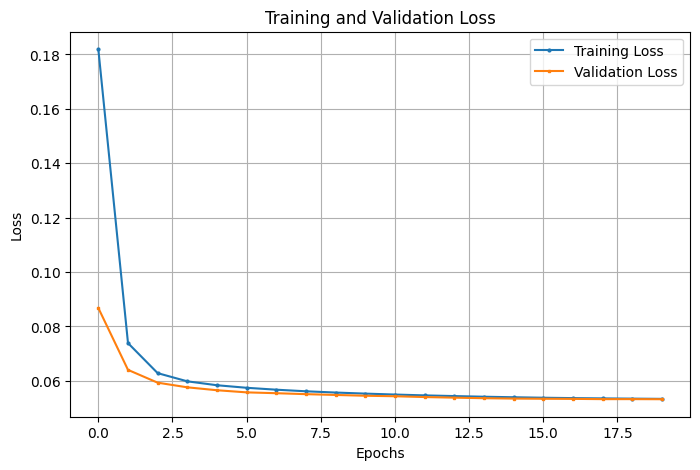

In [7]:
plotter.plot_training_history(ffnn1)

In [8]:
ffnn2 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128, 64],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn2.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn2.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20:   0%|                                               | 0/438 [00:00<?, ?it/s, loss=0.682]

Epoch 1/20: 100%|█████████████████████████████████████| 438/438 [00:03<00:00, 110.36it/s, loss=0.22]


Train Loss: 0.2198 - Val Loss: 0.1088


Epoch 2/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 87.21it/s, loss=0.0907]


Train Loss: 0.0907 - Val Loss: 0.0757


Epoch 3/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 90.48it/s, loss=0.0723]


Train Loss: 0.0723 - Val Loss: 0.0668


Epoch 4/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 76.63it/s, loss=0.0661]


Train Loss: 0.0661 - Val Loss: 0.0629


Epoch 5/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 282.90it/s, loss=0.0631]


Train Loss: 0.0631 - Val Loss: 0.0609


Epoch 6/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 79.07it/s, loss=0.0613]


Train Loss: 0.0613 - Val Loss: 0.0598


Epoch 7/20: 100%|████████████████████████████████████| 438/438 [00:06<00:00, 67.47it/s, loss=0.0601]


Train Loss: 0.0601 - Val Loss: 0.0590


Epoch 8/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 84.17it/s, loss=0.0592]


Train Loss: 0.0592 - Val Loss: 0.0583


Epoch 9/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 80.07it/s, loss=0.0585]


Train Loss: 0.0585 - Val Loss: 0.0578


Epoch 10/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 115.71it/s, loss=0.0579]


Train Loss: 0.0579 - Val Loss: 0.0575


Epoch 11/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 181.95it/s, loss=0.0574]


Train Loss: 0.0574 - Val Loss: 0.0572


Epoch 12/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 132.71it/s, loss=0.0569]


Train Loss: 0.0569 - Val Loss: 0.0568


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 94.34it/s, loss=0.0564]


Train Loss: 0.0564 - Val Loss: 0.0566


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 121.39it/s, loss=0.056]


Train Loss: 0.0560 - Val Loss: 0.0561


Epoch 15/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 112.36it/s, loss=0.0556]


Train Loss: 0.0556 - Val Loss: 0.0561


Epoch 16/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 126.85it/s, loss=0.0553]


Train Loss: 0.0553 - Val Loss: 0.0558


Epoch 17/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 118.80it/s, loss=0.055]


Train Loss: 0.0550 - Val Loss: 0.0557


Epoch 18/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 96.00it/s, loss=0.0548]


Train Loss: 0.0548 - Val Loss: 0.0554


Epoch 19/20: 100%|██████████████████████████████████| 438/438 [00:01<00:00, 316.24it/s, loss=0.0546]


Train Loss: 0.0546 - Val Loss: 0.0556


Epoch 20/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 118.53it/s, loss=0.0544]


Train Loss: 0.0544 - Val Loss: 0.0553
Akurasi: 94.33%


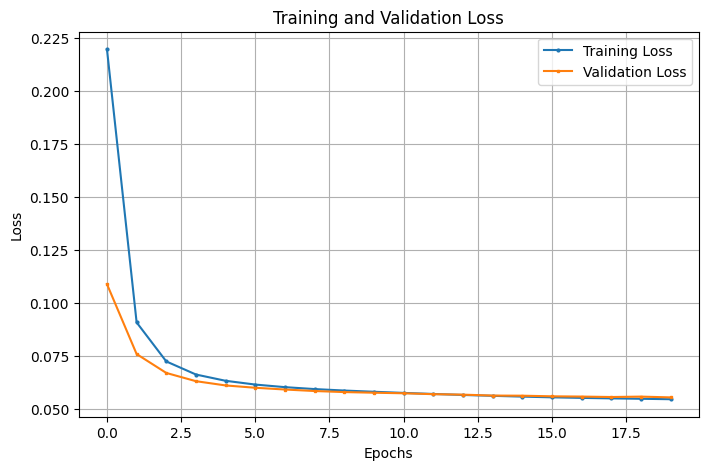

In [9]:
plotter.plot_training_history(ffnn2)

In [10]:
ffnn3 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128, 64, 32],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu', 'relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn3.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn3.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 105.84it/s, loss=0.245]


Train Loss: 0.2452 - Val Loss: 0.1282


Epoch 2/20: 100%|█████████████████████████████████████| 438/438 [00:04<00:00, 96.04it/s, loss=0.105]


Train Loss: 0.1047 - Val Loss: 0.0874


Epoch 3/20: 100%|████████████████████████████████████| 438/438 [00:06<00:00, 66.98it/s, loss=0.0817]


Train Loss: 0.0817 - Val Loss: 0.0744


Epoch 4/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 117.48it/s, loss=0.0729]


Train Loss: 0.0729 - Val Loss: 0.0690


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 83.49it/s, loss=0.0683]


Train Loss: 0.0683 - Val Loss: 0.0653


Epoch 6/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 291.83it/s, loss=0.0653]


Train Loss: 0.0653 - Val Loss: 0.0631


Epoch 7/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 90.39it/s, loss=0.0632]


Train Loss: 0.0632 - Val Loss: 0.0619


Epoch 8/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 108.52it/s, loss=0.0617]


Train Loss: 0.0617 - Val Loss: 0.0608


Epoch 9/20: 100%|████████████████████████████████████| 438/438 [00:06<00:00, 67.68it/s, loss=0.0605]


Train Loss: 0.0605 - Val Loss: 0.0596


Epoch 10/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 82.79it/s, loss=0.0595]


Train Loss: 0.0595 - Val Loss: 0.0588


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:07<00:00, 59.59it/s, loss=0.0588]


Train Loss: 0.0588 - Val Loss: 0.0580


Epoch 12/20: 100%|███████████████████████████████████| 438/438 [00:07<00:00, 56.52it/s, loss=0.0582]


Train Loss: 0.0582 - Val Loss: 0.0578


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:09<00:00, 48.19it/s, loss=0.0577]


Train Loss: 0.0577 - Val Loss: 0.0574


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 66.67it/s, loss=0.0572]


Train Loss: 0.0572 - Val Loss: 0.0571


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 73.89it/s, loss=0.0569]


Train Loss: 0.0569 - Val Loss: 0.0568


Epoch 16/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 105.88it/s, loss=0.0565]


Train Loss: 0.0565 - Val Loss: 0.0567


Epoch 17/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 81.98it/s, loss=0.0563]


Train Loss: 0.0563 - Val Loss: 0.0564


Epoch 18/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 88.26it/s, loss=0.056]


Train Loss: 0.0560 - Val Loss: 0.0562


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:08<00:00, 53.67it/s, loss=0.0558]


Train Loss: 0.0558 - Val Loss: 0.0562


Epoch 20/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 73.56it/s, loss=0.0557]


Train Loss: 0.0557 - Val Loss: 0.0561
Akurasi: 94.33%


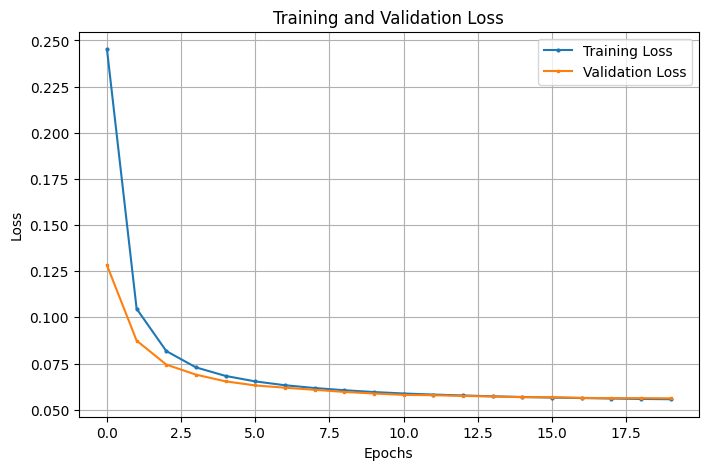

In [11]:
plotter.plot_training_history(ffnn3)

In [12]:
ffnn4 = FFNN(
    input_size=784,
    hidden_sizes=[512, 256],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn4.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn4.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|█████████████████████████████████████| 438/438 [00:11<00:00, 39.36it/s, loss=0.249]


Train Loss: 0.2485 - Val Loss: 0.0825


Epoch 2/20: 100%|████████████████████████████████████| 438/438 [00:07<00:00, 55.37it/s, loss=0.0716]


Train Loss: 0.0716 - Val Loss: 0.0631


Epoch 3/20: 100%|████████████████████████████████████| 438/438 [00:11<00:00, 39.78it/s, loss=0.0629]


Train Loss: 0.0629 - Val Loss: 0.0594


Epoch 4/20: 100%|████████████████████████████████████| 438/438 [00:09<00:00, 44.44it/s, loss=0.0602]


Train Loss: 0.0602 - Val Loss: 0.0578


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [00:11<00:00, 39.62it/s, loss=0.0587]


Train Loss: 0.0587 - Val Loss: 0.0565


Epoch 6/20: 100%|████████████████████████████████████| 438/438 [00:09<00:00, 44.97it/s, loss=0.0576]


Train Loss: 0.0576 - Val Loss: 0.0557


Epoch 7/20: 100%|████████████████████████████████████| 438/438 [00:11<00:00, 36.58it/s, loss=0.0568]


Train Loss: 0.0568 - Val Loss: 0.0552


Epoch 8/20: 100%|████████████████████████████████████| 438/438 [00:11<00:00, 37.92it/s, loss=0.0562]


Train Loss: 0.0562 - Val Loss: 0.0549


Epoch 9/20: 100%|████████████████████████████████████| 438/438 [00:09<00:00, 44.94it/s, loss=0.0558]


Train Loss: 0.0558 - Val Loss: 0.0546


Epoch 10/20: 100%|███████████████████████████████████| 438/438 [00:07<00:00, 55.12it/s, loss=0.0554]


Train Loss: 0.0554 - Val Loss: 0.0543


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:08<00:00, 54.57it/s, loss=0.0551]


Train Loss: 0.0551 - Val Loss: 0.0541


Epoch 12/20: 100%|███████████████████████████████████| 438/438 [00:09<00:00, 46.16it/s, loss=0.0548]


Train Loss: 0.0548 - Val Loss: 0.0539


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 63.95it/s, loss=0.0545]


Train Loss: 0.0545 - Val Loss: 0.0539


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:08<00:00, 52.88it/s, loss=0.0543]


Train Loss: 0.0543 - Val Loss: 0.0537


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:07<00:00, 60.91it/s, loss=0.0541]


Train Loss: 0.0541 - Val Loss: 0.0536


Epoch 16/20: 100%|████████████████████████████████████| 438/438 [00:06<00:00, 65.68it/s, loss=0.054]


Train Loss: 0.0540 - Val Loss: 0.0536


Epoch 17/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 133.04it/s, loss=0.0538]


Train Loss: 0.0538 - Val Loss: 0.0535


Epoch 18/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 74.36it/s, loss=0.0537]


Train Loss: 0.0537 - Val Loss: 0.0534


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 75.90it/s, loss=0.0536]


Train Loss: 0.0536 - Val Loss: 0.0533


Epoch 20/20: 100%|███████████████████████████████████| 438/438 [00:07<00:00, 61.86it/s, loss=0.0535]


Train Loss: 0.0535 - Val Loss: 0.0533
Akurasi: 93.80%


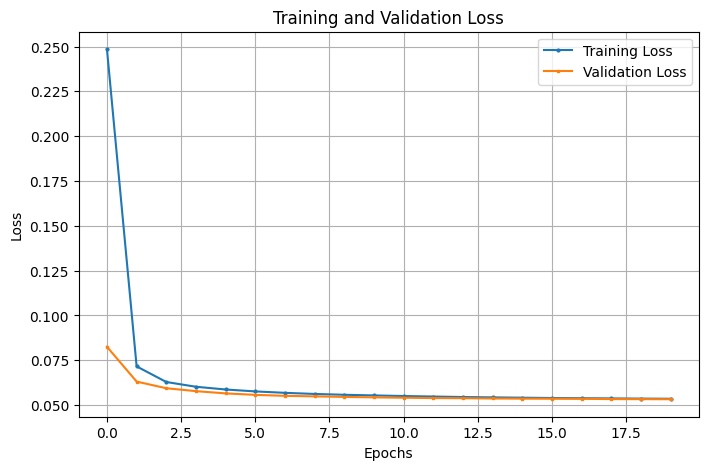

In [13]:
plotter.plot_training_history(ffnn4)

In [14]:
ffnn5 = FFNN(
    input_size=784,
    hidden_sizes=[128, 64],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn5.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn5.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:01<00:00, 223.84it/s, loss=0.139]


Train Loss: 0.1392 - Val Loss: 0.0850


Epoch 2/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 220.44it/s, loss=0.0755]


Train Loss: 0.0755 - Val Loss: 0.0662


Epoch 3/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 236.44it/s, loss=0.0644]


Train Loss: 0.0644 - Val Loss: 0.0603


Epoch 4/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 240.26it/s, loss=0.0604]


Train Loss: 0.0604 - Val Loss: 0.0577


Epoch 5/20: 100%|██████████████████████████████████| 438/438 [00:00<00:00, -522.78it/s, loss=0.0585]


Train Loss: 0.0585 - Val Loss: 0.0565


Epoch 6/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 160.49it/s, loss=0.0574]


Train Loss: 0.0574 - Val Loss: 0.0557


Epoch 7/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 202.36it/s, loss=0.0567]


Train Loss: 0.0567 - Val Loss: 0.0553


Epoch 8/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 200.27it/s, loss=0.0562]


Train Loss: 0.0562 - Val Loss: 0.0550


Epoch 9/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 165.97it/s, loss=0.0558]


Train Loss: 0.0558 - Val Loss: 0.0547


Epoch 10/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 190.98it/s, loss=0.0554]


Train Loss: 0.0554 - Val Loss: 0.0544


Epoch 11/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 198.51it/s, loss=0.0552]


Train Loss: 0.0552 - Val Loss: 0.0542


Epoch 12/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 186.85it/s, loss=0.0549]


Train Loss: 0.0549 - Val Loss: 0.0541


Epoch 13/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 197.28it/s, loss=0.0547]


Train Loss: 0.0547 - Val Loss: 0.0540


Epoch 14/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 207.26it/s, loss=0.0545]


Train Loss: 0.0545 - Val Loss: 0.0538


Epoch 15/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 204.21it/s, loss=0.0543]


Train Loss: 0.0543 - Val Loss: 0.0538


Epoch 16/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 172.66it/s, loss=0.0542]


Train Loss: 0.0542 - Val Loss: 0.0536


Epoch 17/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 216.77it/s, loss=0.054]


Train Loss: 0.0540 - Val Loss: 0.0535


Epoch 18/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 201.85it/s, loss=0.0539]


Train Loss: 0.0539 - Val Loss: 0.0535


Epoch 19/20: 100%|████████████████████████████████| 438/438 [00:00<00:00, -6165.22it/s, loss=0.0538]


Train Loss: 0.0538 - Val Loss: 0.0535


Epoch 20/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 204.07it/s, loss=0.0537]


Train Loss: 0.0537 - Val Loss: 0.0535
Akurasi: 93.83%


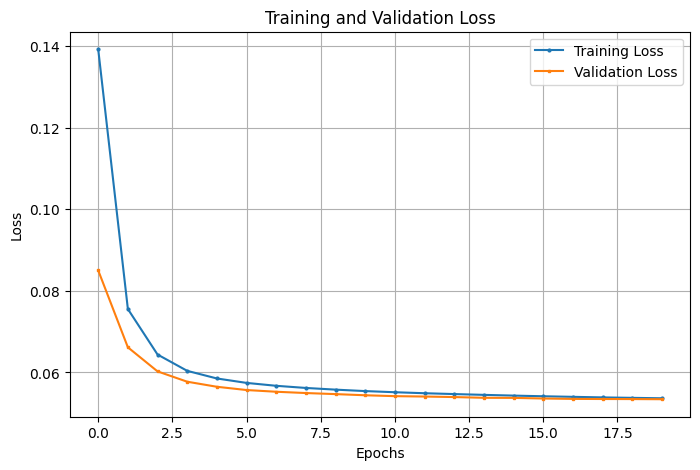

In [15]:
plotter.plot_training_history(ffnn5)